In [23]:
# Imports
import gzip, json, os # as some instance files may have been compressed

# Re-import dependencies (in case earlier import was skipped)
import numpy    as np
import numpy.ma as ma
from os.path    import basename
from math       import ceil, log2
from matplotlib import pyplot as plt


from run_experiment import to_masked, plot_boxplots, plot_best, extract_data, plot_inverted_boxplots, gen_save_files

folder = os.path.abspath("")

In [48]:
# data_file   = f"{folder}/data/crossover_funcs.json"
# data_file   = f"{folder}/data/pop_size.json"
# data_file   = f"{folder}/data/linkage_based_crossover.json"
data_file   = f"{folder}/data/region_based_crossover.json"
# data_file   = f"{folder}/data/fixed_linkage_based_crossover.json"
# data_file   = f"{folder}/data/fixed_region_based_crossover.json"
# data_file   = f"{folder}/data/custom_init_pmx.json"

test_type   = basename(data_file).split(".")[0]

with open(data_file, "rt") as f:
    setup_names, all_fitnesses_overtime, all_iterations, all_total_times, all_iter_times = json.load(f)



setup_idxs          = {setup_name: i for i, setup_name in enumerate(setup_names)}

all_fitnesses       = to_masked(all_fitnesses_overtime)
# Average from the different runs
all_fitnesses_avg   = np.ma.mean(all_fitnesses, axis=1)

optimal_sol=5426670

print(test_type)
print(setup_names)

region_based_crossover
['Baseline', 'Custom Initialisation', 'Region Based Crossover', 'Custom Initialisation and Region Based Crossover']


In [50]:
idx = 3

print(setup_names[idx])
all_fitnesses[idx].shape

print("Overall Best:", np.ma.min(all_fitnesses[idx]))
print("Best Avg:", np.ma.min(all_fitnesses_avg[idx]))

Custom Initialisation and Region Based Crossover
Overall Best: 5434542.0
Best Avg: 5436799.1


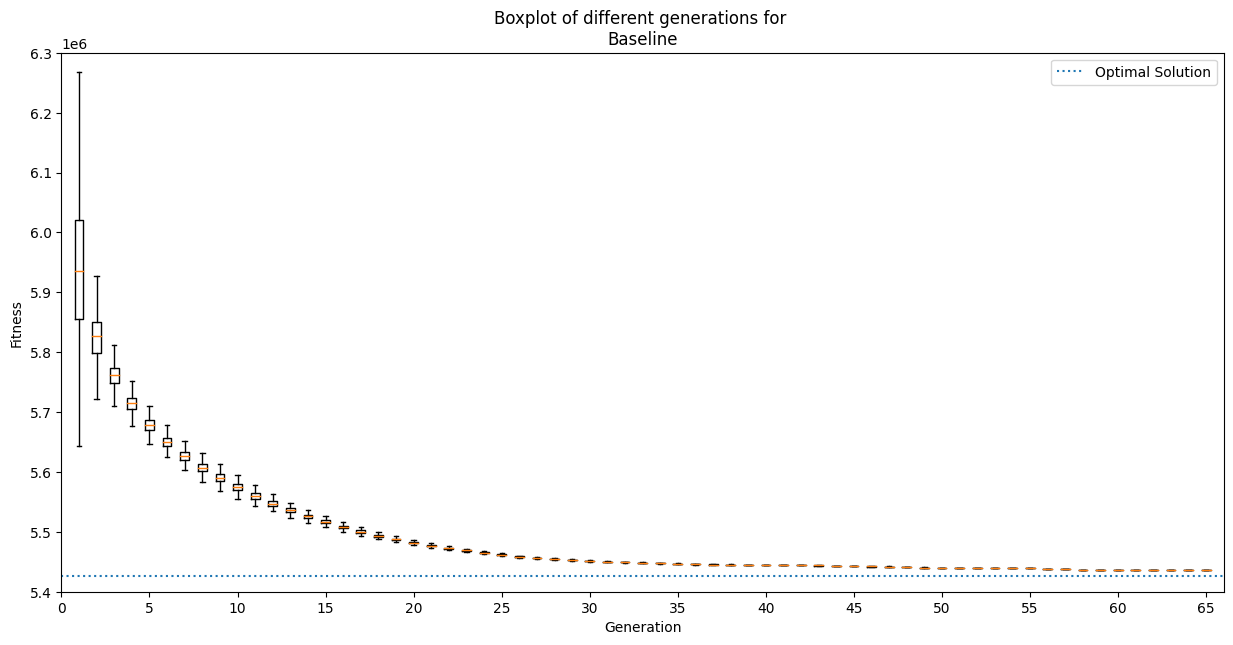

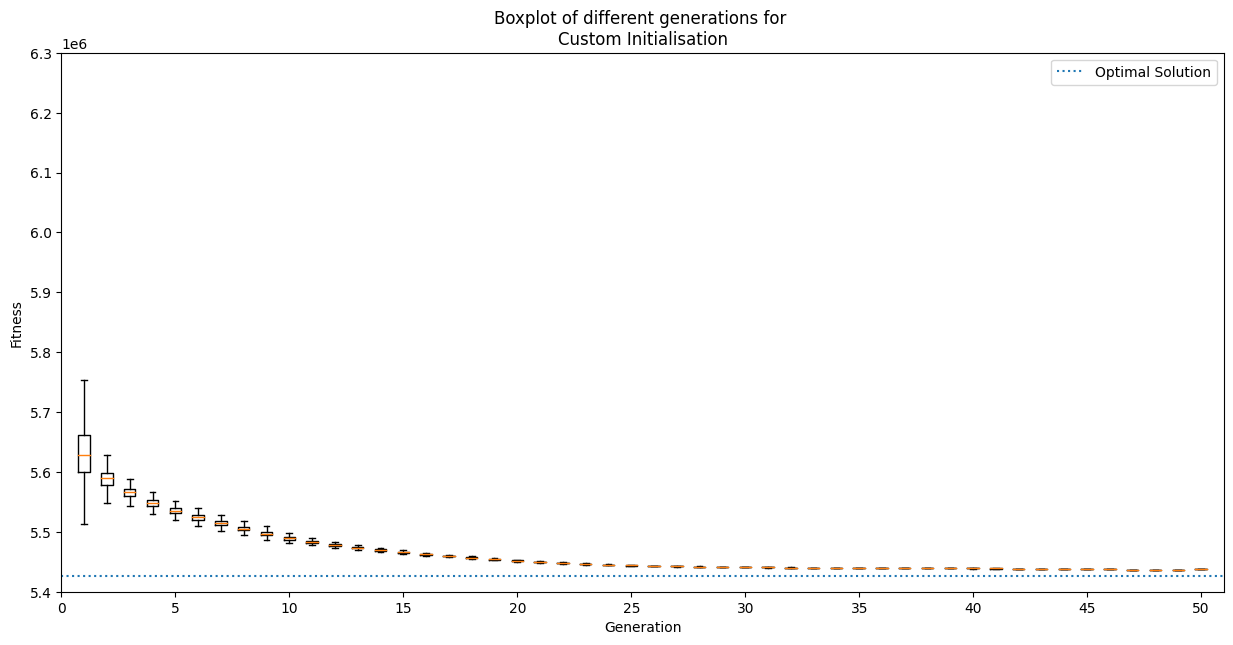

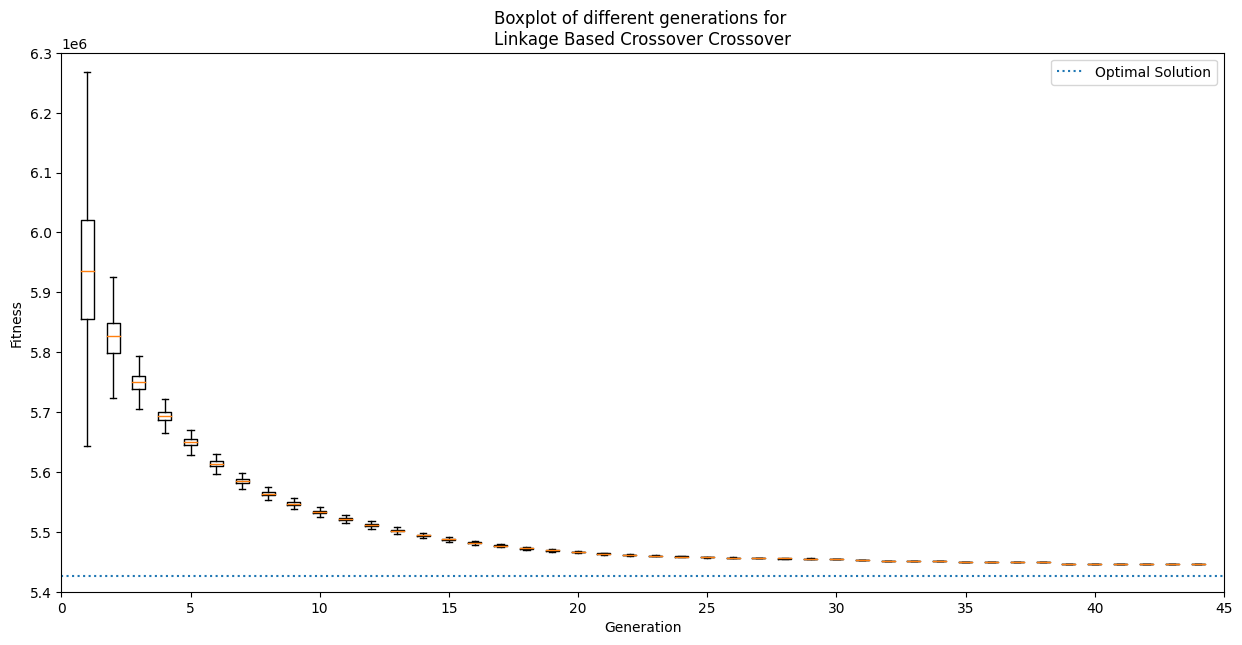

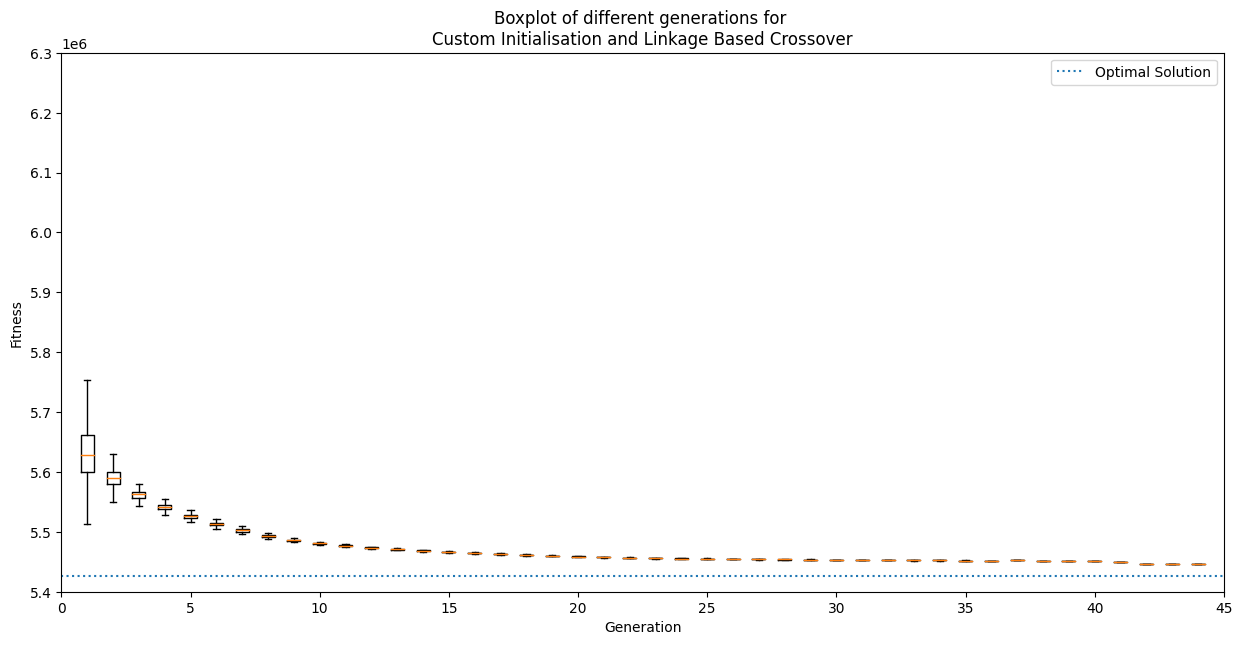

In [3]:
plot_boxplots(all_fitnesses_avg, setup_names, optimal_sol)

In [33]:
# filenames = ["boxplot_" + s.split("**")[-1] for s in setup_names]
filenames = [s.lower() for s in setup_names]
save_files = gen_save_files(folder, filenames, test_type, "boxplots")

save_files

['c:\\Users\\Owner\\My Data\\Master\\Y1 Q4\\Evolutionary Algorithms\\Project\\EA-Keyboard-Layout/graphs/fixed_region_based_crossover/boxplots/pmx_rng.png',
 'c:\\Users\\Owner\\My Data\\Master\\Y1 Q4\\Evolutionary Algorithms\\Project\\EA-Keyboard-Layout/graphs/fixed_region_based_crossover/boxplots/custom_initialisation.png',
 'c:\\Users\\Owner\\My Data\\Master\\Y1 Q4\\Evolutionary Algorithms\\Project\\EA-Keyboard-Layout/graphs/fixed_region_based_crossover/boxplots/region_based_crossover.png',
 'c:\\Users\\Owner\\My Data\\Master\\Y1 Q4\\Evolutionary Algorithms\\Project\\EA-Keyboard-Layout/graphs/fixed_region_based_crossover/boxplots/custom_initialisation_and_region_based_crossover.png']

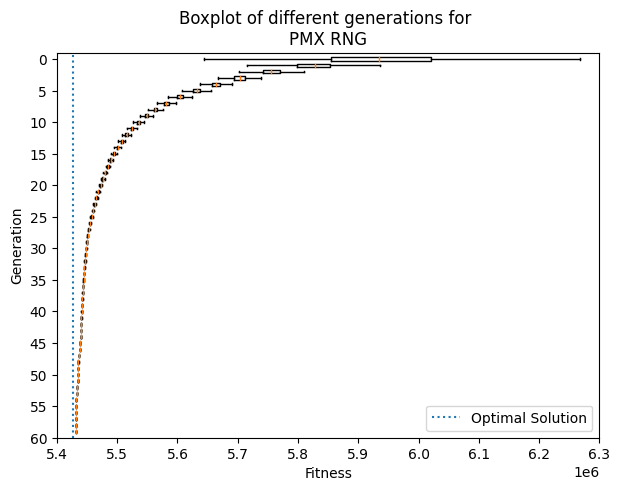

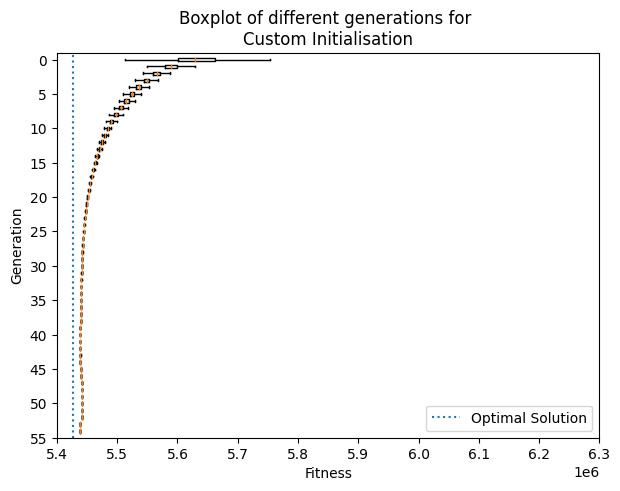

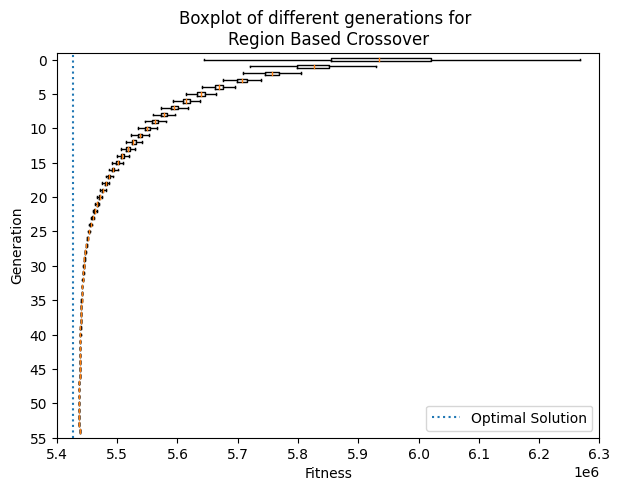

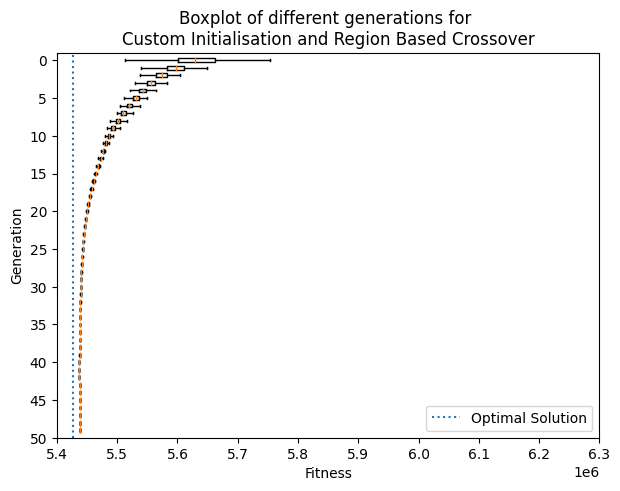

In [34]:
plot_inverted_boxplots(all_fitnesses_avg, setup_names, optimal_sol, save_files=save_files)

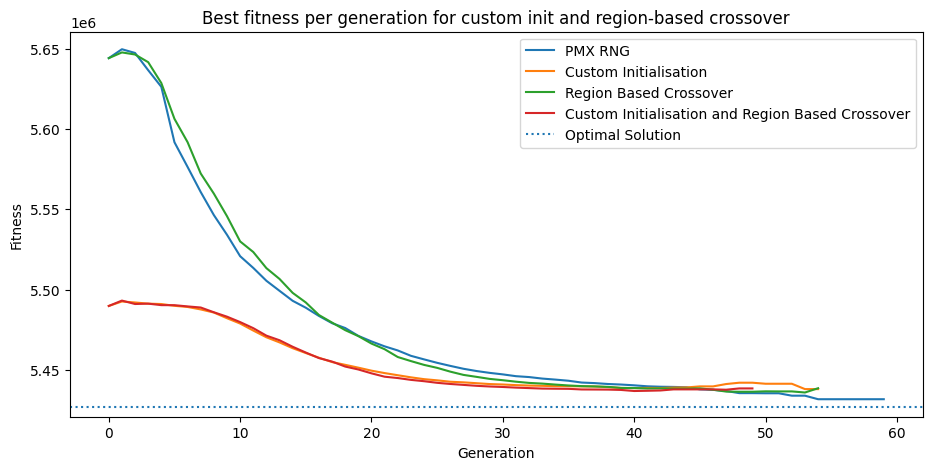

In [35]:
fig = plt.figure(figsize=(11, 5))

plot_best(all_fitnesses_avg, setup_names, f"custom init and region-based crossover", optimal_sol)

In [ ]:
# # pop size

# names = [x.split(" ")[-1] for x in setup_names]
# plot_best(all_fitnesses_avg, names, setup_idxs, optimal_sol, legend_title)

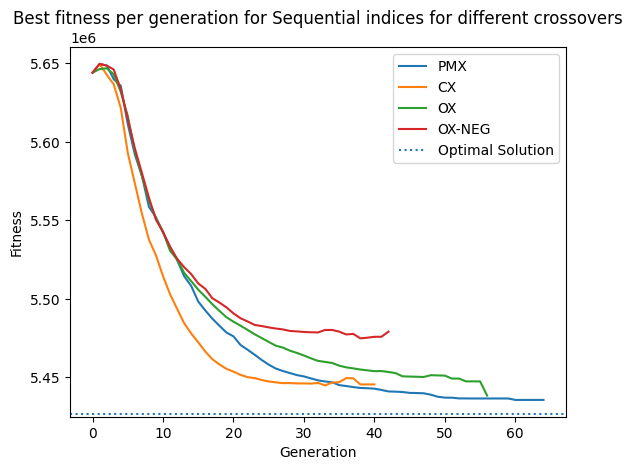

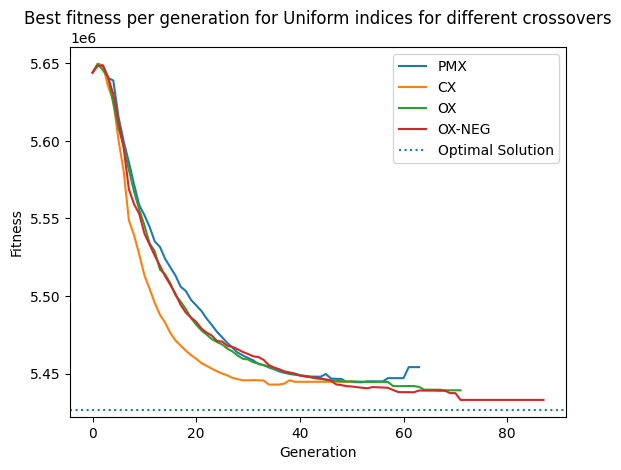

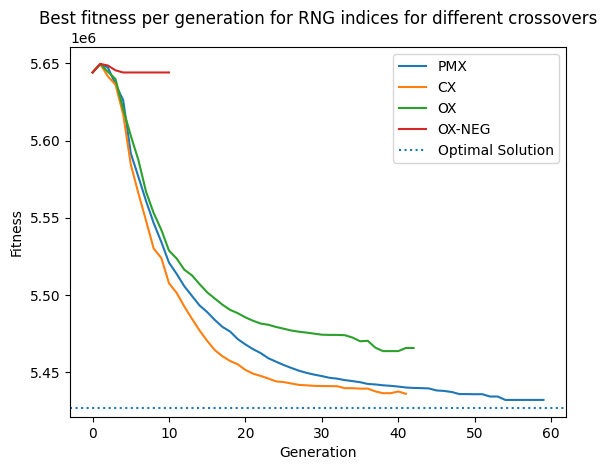

------------------------------------------------


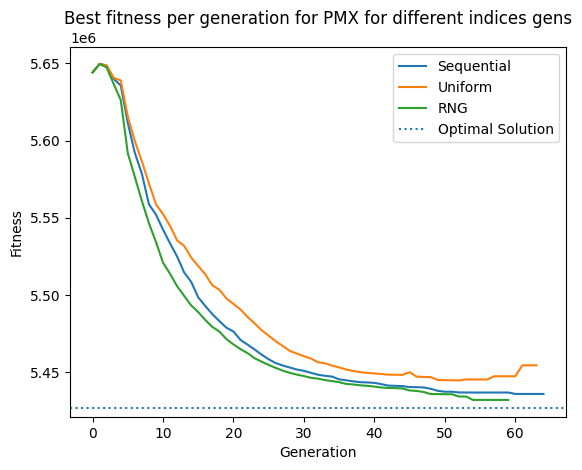

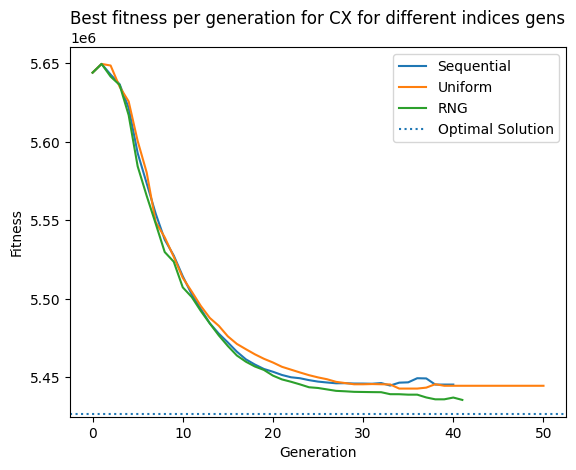

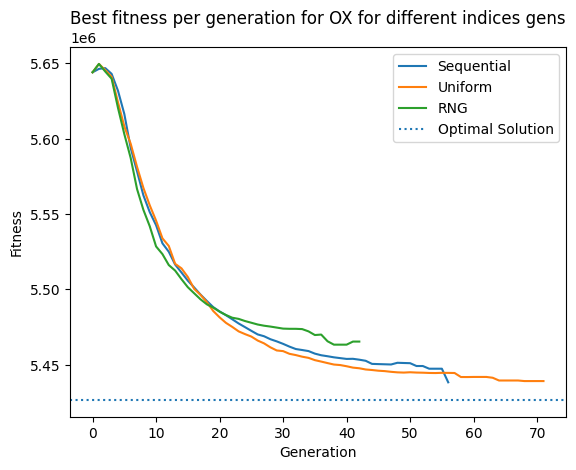

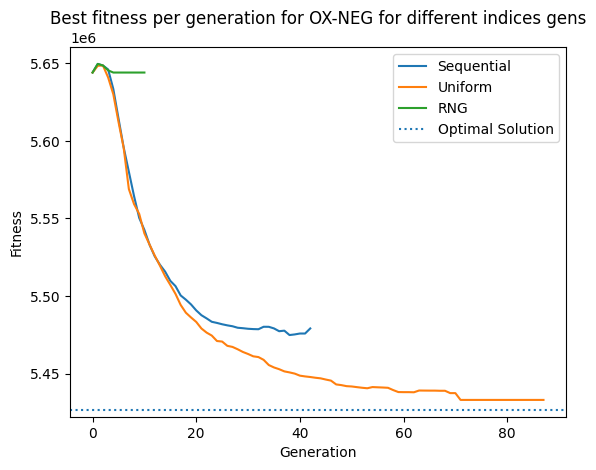

In [4]:
# crossover indices-gen

indices_gen_results = {}
crossover_results = {}


for data, setup_name in zip(all_fitnesses_avg, setup_names):
    crossover_fn, indices_gen = setup_name.split(" ")

    if indices_gen not in indices_gen_results:
        indices_gen_results[indices_gen] = ([], [])

    if crossover_fn not in crossover_results:
        crossover_results[crossover_fn] = ([], [])

    indices_gen_results[indices_gen][0].append(crossover_fn)
    indices_gen_results[indices_gen][1].append(data)

    crossover_results[crossover_fn] [0].append(indices_gen)
    crossover_results[crossover_fn] [1].append(data)



for indices_gen, (crossover_funcs, data) in indices_gen_results.items():
    plot_best(np.ma.array(data), crossover_funcs, f"{indices_gen} indices for different crossovers", optimal_sol)

print("------------------------------------------------")


for crossover_fn, (indices_gens, data) in crossover_results.items():
    plot_best(np.ma.array(data), indices_gens, f"{crossover_fn} for different indices gens", optimal_sol)

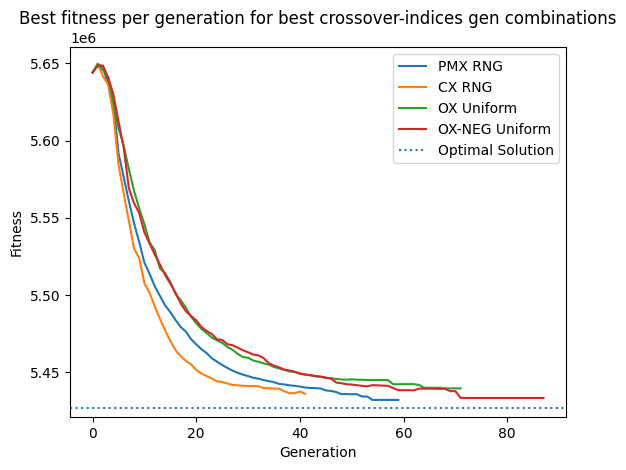

In [5]:
# best crossover indices-gen

best_per_crossover = ["PMX RNG", "CX RNG", "OX Uniform", "OX-NEG Uniform"]
data = extract_data(all_fitnesses_avg, setup_idxs, best_per_crossover)

plot_best(data, best_per_crossover, "best crossover-indices gen combinations", optimal_sol)